<a href="https://colab.research.google.com/github/ChristophWuersch/satw/blob/main/customer-segmentation-clustering_Olten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ChristophWuersch/satw/main/ost_logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> satw TecDay </b> <br> Der Fluch der Dimensionalität, 2022 <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Kundensegmentierung

- In diesem Projekt werden wir ein unüberwachtes Clustering von Kundendaten aus der Datenbank eines Lebensmittelherstellers durchführen. 
- Unter Kundensegmentierung versteht man die Einteilung von Kunden in Gruppen, die Ähnlichkeiten zwischen den Kunden in jedem Cluster widerspiegeln. 
- Wir werden die Kunden in Segmente unterteilen, um die Bedeutung jedes Kunden für das Unternehmen zu optimieren, z.B. um die Produkte entsprechend den unterschiedlichen Bedürfnissen und Verhaltensweisen der Kunden anzupassen. 
- Außerdem hilft es dem Unternehmen, auf die Belange der verschiedenen Kundentypen einzugehen.

    
* [1. Importieren der notwendigen Bibliotheken](#1)
    
* [2. Laden der Daten](#2)

* [3. Daten bereinigen](#3)
    
* [4. Datenvorverarbeitung](#4)   
    
* [5. Dimensionsreduktion](#5) 
      
* [6. Cluster-Analyse](#6)
    
* [7. Modellevaluation und Interpretation](#7)

* [8. Customer Profiling](#8) 


<a id="2"></a>
## 1. Importieren der notwendigen Bibliotheken (packages)

In [61]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
## 2. Laden der Daten

Die Rohdaten enthalten viele kategoriale Mermale, wie z.B. der Zivilstand.

In [62]:
#Loading the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv("https://raw.githubusercontent.com/ChristophWuersch/satw/main/marketing_campaign.csv", sep="\t")
df.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


![About the Dataset](https://raw.githubusercontent.com/ChristophWuersch/satw/main/About_Dataset.png)

Mehr Informationen zum Datensatz gibts [hier](https://www.kaggle.com/imakash3011/customer-personality-analysis).

In [63]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


<a id="3"></a>
## 3. Data Cleaning

Damit man mit diesen Kategorien rechnen und Machine-Learning-Modelle bauen kann, müssen diese kategorischen Merkmale umgewandelt werden. 
- Einige redundante Merkmale werden wir entfernen (z.B. `martial_status`).
- Ausserdem generieren wir aus den bestehenden Merkmale auch neue Features, wie z.B. `Customer_For`, welche die Anzahl der Tage seit dem letzten Kauf angibt.

Um diesen - recht aufwändigen Schritt - abzukürzen, laden wir direkt den bereinigten Datensatz.

In [64]:
data = pd.read_csv("https://raw.githubusercontent.com/ChristophWuersch/satw/main/marketing_campaign_cleaned.csv", index_col=0)
print("Number of datapoints:", len(data))
data.head(20)

Number of datapoints: 2212


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,40,422,Partner,1,3,1
5,Postgraduate,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,39139200000000000,54,716,Partner,1,3,1
6,Graduate,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,65059200000000000,50,590,Alone,1,2,1
7,Postgraduate,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,42163200000000000,36,169,Partner,1,3,1
8,Postgraduate,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,47347200000000000,47,46,Partner,1,3,1
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,23155200000000000,71,49,Partner,2,4,1


In [65]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [66]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,0.150542,4.424926e+16,52.086347,607.268083,0.947559,2.593128,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.357683,2.009245e+16,11.701599,602.513364,0.749466,0.906236,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,397.000000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,81.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

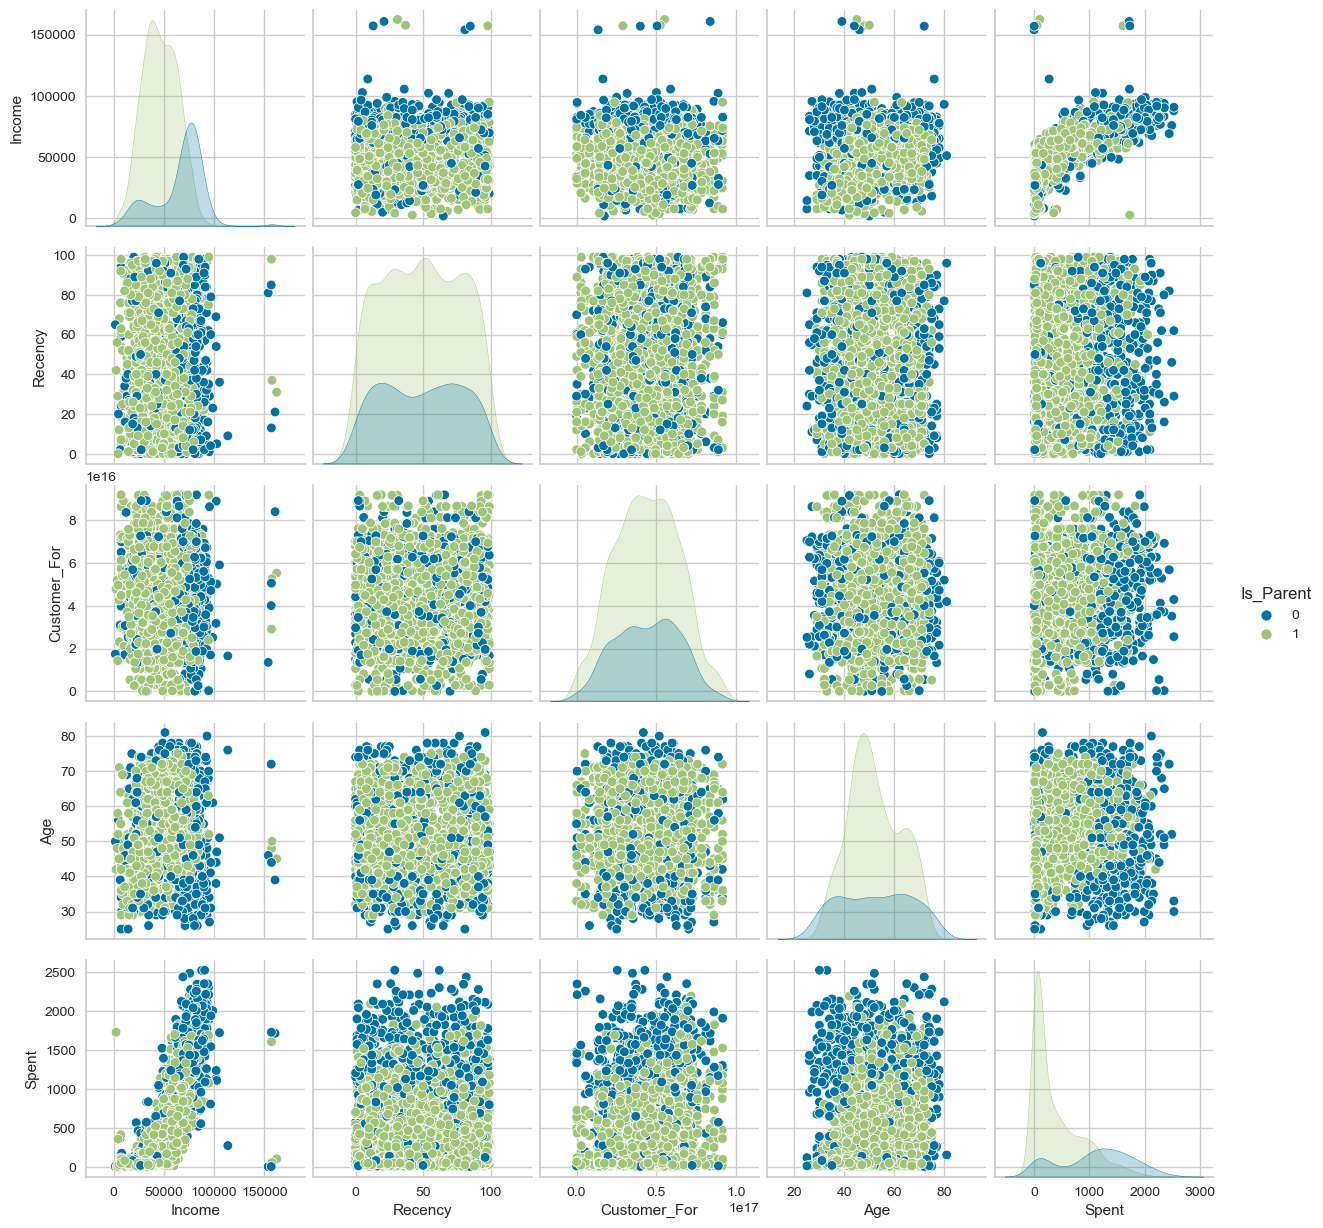

In [67]:
#Wir plotten einige ausgewählte Merkmale (features) als Scatterplot

To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

Die Daten sind recht sauber und die neuen Funktionen wurden aufgenommen. Ich werde mit dem nächsten Schritt fortfahren. Das heißt, die Vorverarbeitung der Daten. 

<a id="4"></a>
# 4. Preprocessing - Datenvorverarbeitung

Normalerweise müssen die Daten vorverarbeitet werden, um Clustering-Operationen durchzuführen zu können.

**Die folgenden Schritte werden zur Vorverarbeitung der Daten angewandt:**

* Kodierung der kategorialen Merkmale mit gewissen Labeln
* Skalierung der Merkmale mit dem Standard-Skalierer (Standardisierung auf Normalverteilung)
* Erstellen eines Subset-Datenrahmens zur Dimensionalitätsreduktion

In [68]:
#data.to_csv('marketing_campaign_cleaned.csv')

In [69]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [70]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [71]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [72]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<a id="5"></a>
# 5. Dimensionsreduktion

Bei diesem Problem gibt es viele Merkmale oder Attribute, auf deren Grundlage die endgültige Kundensegmentierung vorgenommen werden könnte.

- Je grösser die Anzahl der Merkmale ist, desto schwieriger ist es, mit ihnen zu arbeiten. 
- Viele dieser Merkmale sind korreliert und daher redundant. 
- Aus diesem Grund werden wir die ausgewählten Merkmale einer Dimensionalitätsreduktion unterziehen bevor wir diese einer Cluster-Analyse unterziehen

*Bei der Dimensionalitätsreduktion wird die Anzahl der betrachteten Zufallsvariablen reduziert, indem ein Satz von Hauptvariablen ermittelt wird.* 

- Die **Hauptkomponentenanalyse (PCA)** ist eine Technik zur Reduzierung der Dimensionalität solcher Datensätze, die die Interpretierbarkeit erhöht und gleichzeitig den Informationsverlust minimiert. 
- Durch Methoden der Dimensionsreduktion lassen sich dichte Datenrepräsentationen erzeugen, wo Abstände wieder Sinn machen (vgl. Fluch der Dimensionalität) und somit über Abstandsmetriken ähnliche Daten (Kunden) näher beieinander liegen, während Kunden mit sehr unterschiedlichem Kaufverhalten in diesem Merkmalsraum sehr weit voneinander entfernt sind.



### Dimensionalitätsreduktion mit PCA

- Für dieses Projekt werde wir die Dimensionen auf 3 reduzieren.
- Dies hat den Vorteil, dass wir den gesamten, reduzierten Datensatz in einem 3D-Koordinatensystem visualisieren können.
- Vielleicht lassen sich so bereits Cluster erkennen.

In [73]:
#PCA initialisieren, um die Dimensionen alias Merkmale auf 3 zu reduzieren

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.323033e-16,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-1.395307e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,8.672990e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


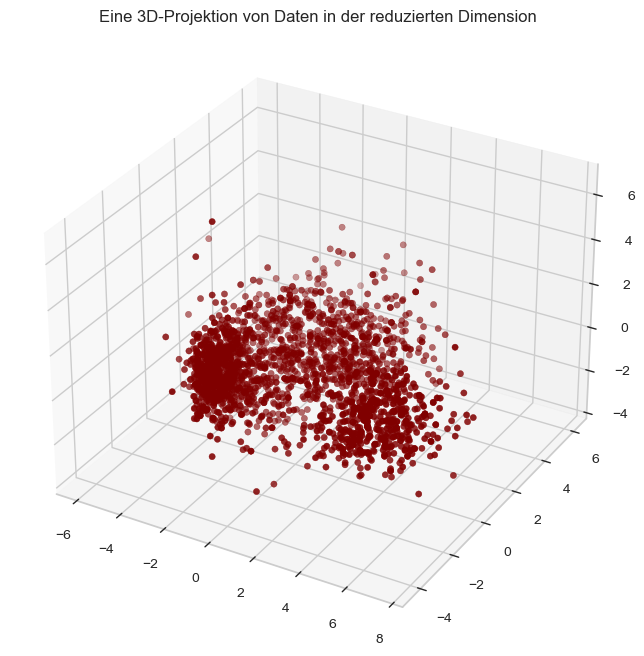

In [74]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Eine 3D-Projektion von Daten in der reduzierten Dimension")
plt.show()

<a id="6"></a>
# 6. Cluster-Analyse

- Nachdem wir nun die Attribute auf drei Dimensionen reduziert haben, werden ich das Clustering mittels **Agglomerativem Clustering** durchführen. 
- Agglomeratives Clustering ist eine hierarchische Clustering-Methode. 
- Dabei werden Beispiele zusammengeführt, bis die gewünschte Anzahl von Clustern erreicht ist.

**Schritte des Clusterns**
1. Elbow-Methode zur Bestimmung der Anzahl der zu bildenden Cluster
2. Clustering mittels Agglomerative Clustering
3. Untersuchung der gebildeten Cluster mittels Streudiagramm

Elbow-Methode zur Bestimmung der Anzahl der zu bildenden Cluster:


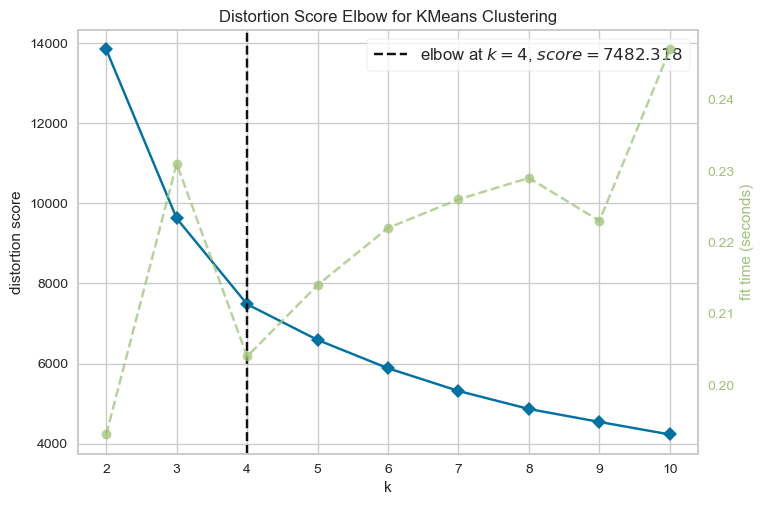

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
# Kurze Prüfung der Ellbogenmethode zur Ermittlung der Anzahl der zu bildenden Cluster.

print('Elbow-Methode zur Bestimmung der Anzahl der zu bildenden Cluster:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Die obige Zelle zeigt, dass *vier eine optimale Anzahl von Clustern* für diese Daten sind. 
Als Nächstes werden wir das agglomerative Clustering-Modell anpassen, um die endgültigen Cluster zu erhalten.

In [76]:
#Instanzierung des Modells für Agglomeratives Clustern

AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

Um die gebildeten Cluster zu untersuchen, werfen wir einen Blick auf die 3-D-Verteilung der Cluster. 

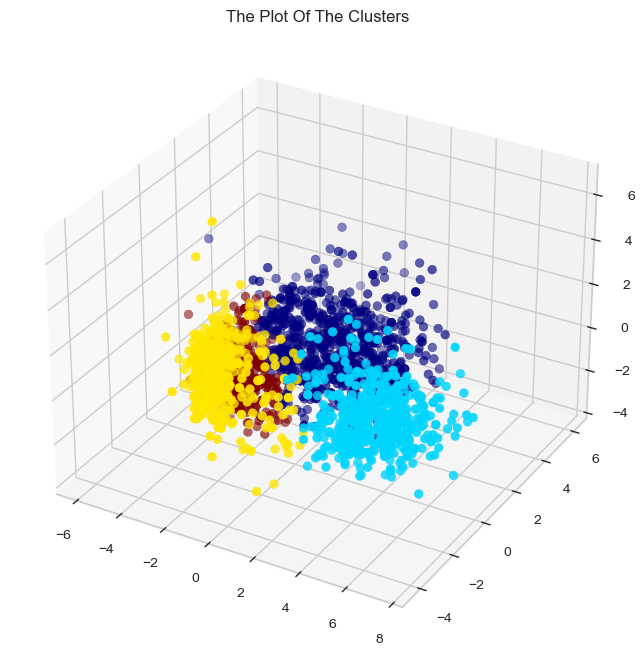

In [77]:
#Darstellen der Clusters (die nun ein Label bekommen haben)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o',cmap='jet')
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="7"></a>
# 7. Modellevaluation und Interpretation

Da es sich um ein unüberwachtes Clustering handelt. Wir verfügen nicht über ein markiertes Merkmal, um unser Modell zu bewerten oder einzuschätzen. Der Zweck dieses Abschnitts ist es, die Muster in den gebildeten Clustern zu untersuchen und die Art der Clustermuster zu bestimmen. 

Zu diesem Zweck werden wir die Daten mittels einer explorativen Datenanalyse im Hinblick auf die Cluster betrachten und Schlussfolgerungen ziehen. 

**Zunächst wollen wir uns die Gruppenverteilung der Cluster** ansehen.

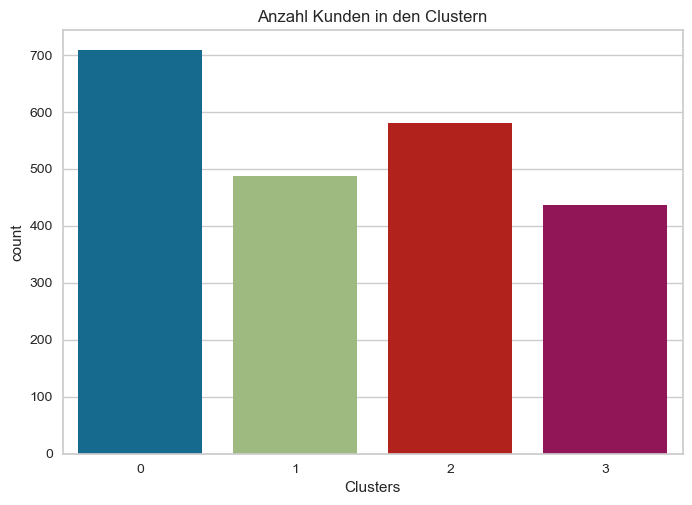

In [78]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Anzahl Kunden in den Clustern")
plt.show()

Es scheint, dass die Cluster in etwa gleichmässig verteilt sind, d.h. dass wir Kundengruppen identifiziert haben, die etwa gleich viele Vertreter haben.

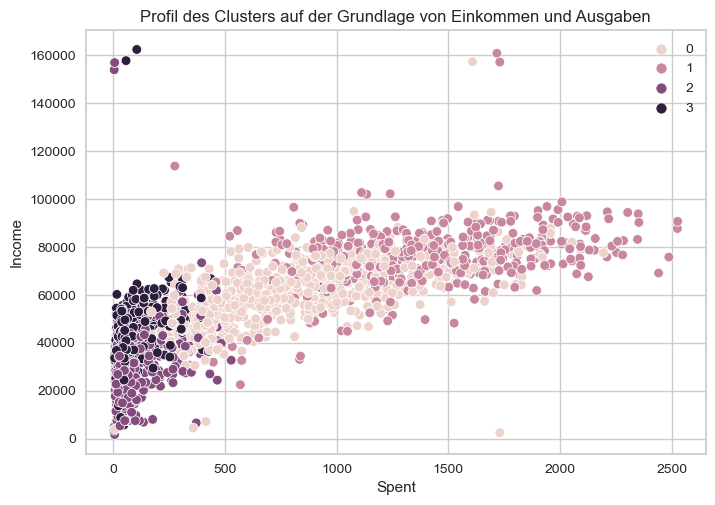

In [79]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"])
pl.set_title("Profil des Clusters auf der Grundlage von Einkommen und Ausgaben")
plt.legend()
plt.show()

**Einkommen/Ausgaben-Diagramm zeigt das Cluster-Muster**

* Gruppe 0: hohe Ausgaben und durchschnittliches Einkommen
* Gruppe 1: hohe Ausgaben und hohes Einkommen
* Gruppe 2: niedrige Ausgaben und niedriges Einkommen 
* Gruppe 3: hohe Ausgaben und niedriges Einkommen  

Als Nächstes werden wir uns die detaillierte Verteilung der Cluster nach den verschiedenen Produkten in den Daten ansehen. Nämlich: Weine, Früchte, Fleisch, Fisch, Süßigkeiten und Gold

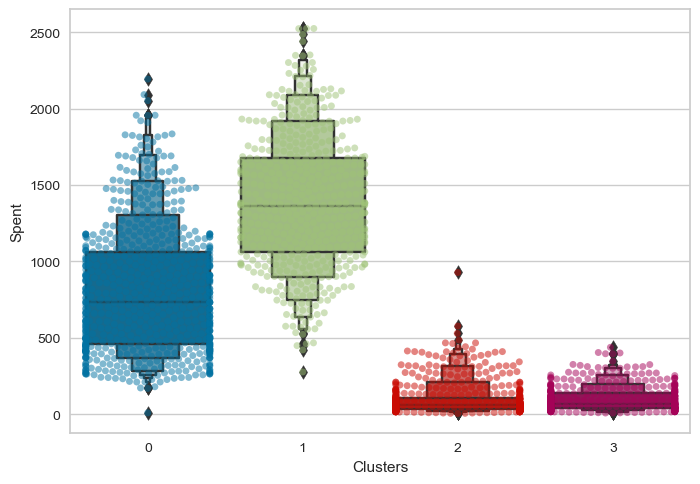

In [80]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"])
plt.show()

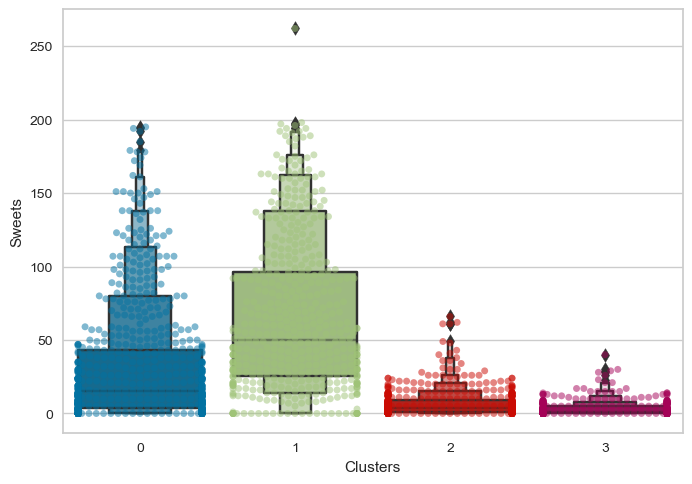

In [81]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Sweets"], alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Sweets"])
plt.show()

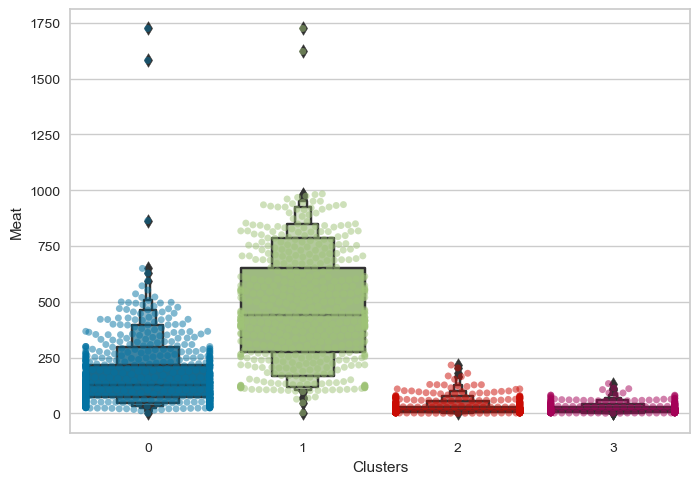

In [82]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Meat"], alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Meat"])
plt.show()

Let us next explore how did our campaigns do in the past.

<a id="8"></a>
# 8. Customer Profiling

- Nun wollen wir sehen, wer alles zu diesen Clustern gehört. 
- Dazu werden wir ein Profil der gebildeten Cluster erstellen und zu einer Schlussfolgerung darüber kommen, wer unser Star-Kunde ist und wer mehr Aufmerksamkeit vom Marketingteam des Einzelhandelsgeschäfts benötigt.

Um dies zu entscheiden, werden wir einige der Merkmale, die für die persönlichen Eigenschaften des Kunden kennzeichnend sind, für jeden Cluster aufzeichenn. Auf der Grundlage der Ergebnisse können wir dann gewisse Schlussfolgerungen ziehen. 

Kidhome


<Figure size 800x550 with 0 Axes>

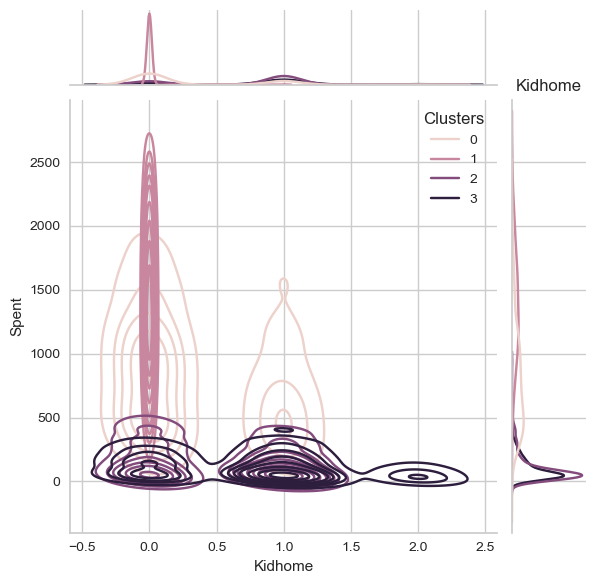

Teenhome


<Figure size 800x550 with 0 Axes>

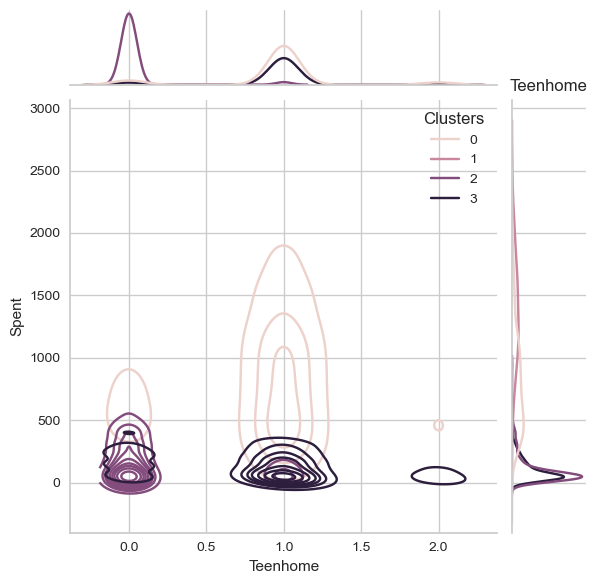

Customer_For


<Figure size 800x550 with 0 Axes>

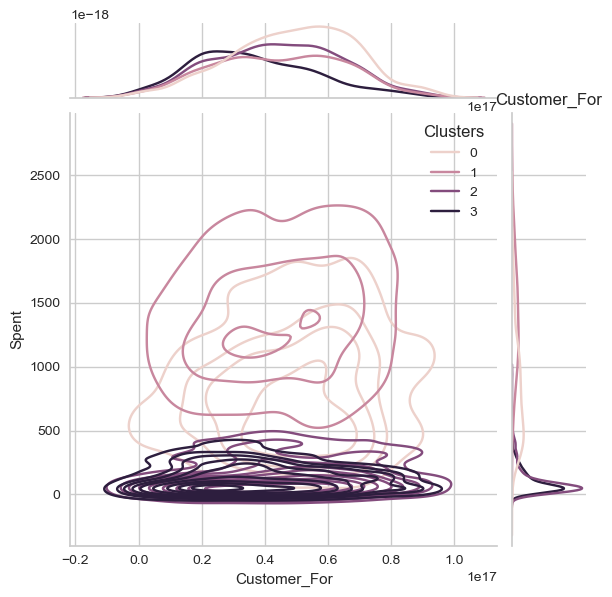

Age


<Figure size 800x550 with 0 Axes>

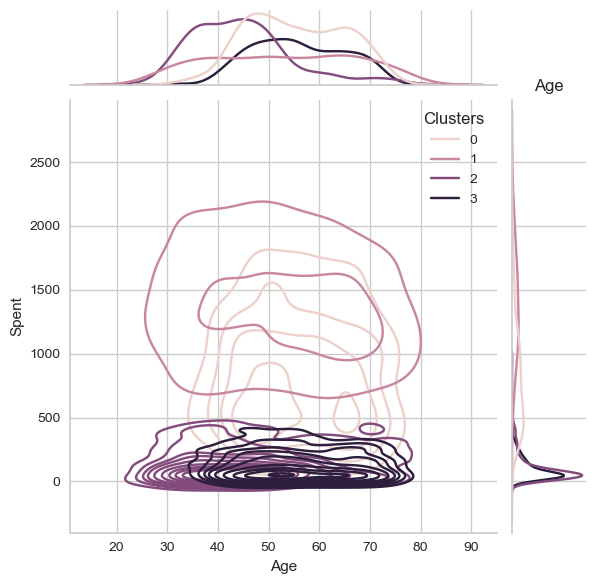

Children


<Figure size 800x550 with 0 Axes>

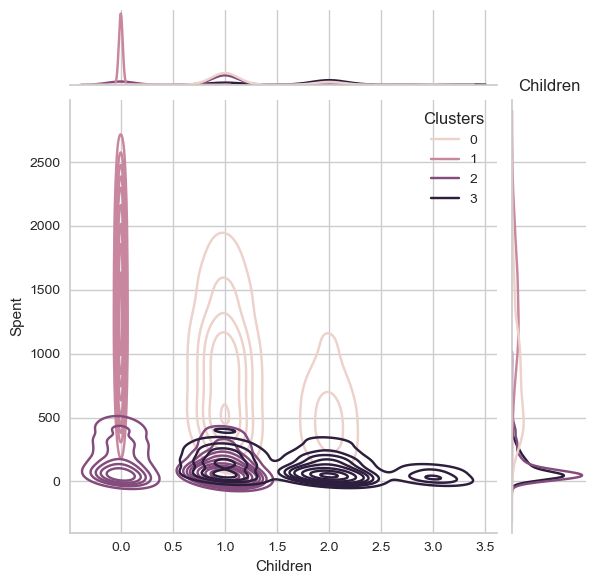

Family_Size


<Figure size 800x550 with 0 Axes>

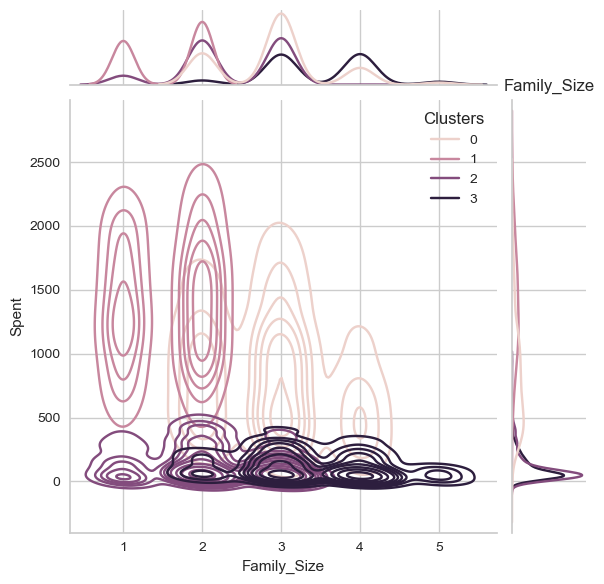

Is_Parent


<Figure size 800x550 with 0 Axes>

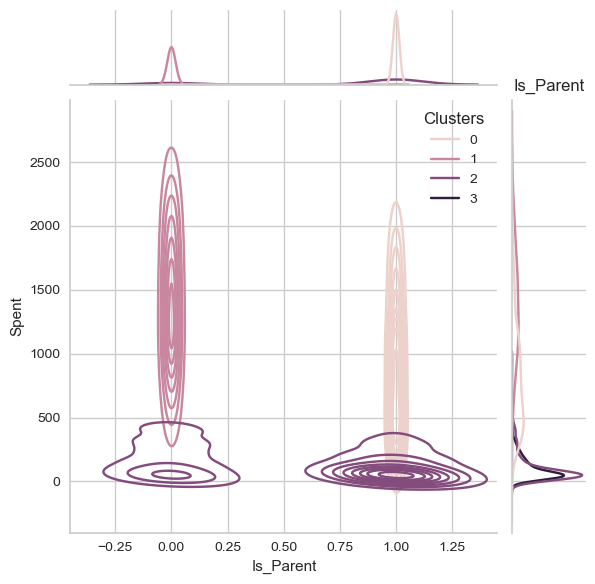

Education


In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for Feature in Personal:
    print(Feature)
    plt.figure()
    sns.jointplot(x=data[Feature], y=data["Spent"], hue =data["Clusters"], kind="kde");
    plt.title(Feature)
    plt.show();


## Cluster 0
- sind Eltern
- die Familien bestehen aus mindestens 2, maximal aus 4 Personen
- Alleinerziehende Eltern sind dabei
- die meisten haben noch Kinder im Teenager-Alter
- eher ältere Personen

## Cluster 1:
- sind sicher keine Eltern
- maximal 2-Personenhaushalte
- leicht mehr Paare als Einzelpersonen
- über alle Altersgruppen verteilt
- hohes Einkommen

## Cluster 2:
- die Mehrheit in dieser Gruppe sind Eltern
- maximal 3-Personen im Haushalt
- die Mehrheit hat nur ein Kind (und typischerweise keine Teenager)
- eher junge Personen

## Cluster 3:
- sind Eltern
- maximal 5 Personen im Haushalt, im Minimum 2
- die meisten haben Kinder im Teenager-Alter
- eher ältere Personen
- eher geringeres Einkommen


